In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# <i>CSV IMPORT</i>

In [2]:
df_list = []

for i in range(19, 31):
    file_path = f"../../datasets/eda_dataset/urls_{i}.csv"
    
    try:
        df = pd.read_csv(file_path)
        df_list.append(df)
        print(f"Loaded: urls_{i}.csv")
    except FileNotFoundError:
        print(f"File not found: urls_{i}.csv")

cf1 = pd.concat(df_list, ignore_index=True)

print(f"\nCombined DataFrame 1 shape: {cf1.shape}")

Loaded: urls_19.csv
Loaded: urls_20.csv
Loaded: urls_21.csv
Loaded: urls_22.csv
Loaded: urls_23.csv
Loaded: urls_24.csv
Loaded: urls_25.csv
Loaded: urls_26.csv
Loaded: urls_27.csv
Loaded: urls_28.csv
Loaded: urls_29.csv
Loaded: urls_30.csv

Combined DataFrame 1 shape: (1200000, 40)


In [3]:
df_list =[]

for i in range(31, 37):
    if i == 31:
        continue
    
    file_path = f"../../datasets/eda_dataset/urls_{i}.csv"
    
    try:
        df = pd.read_csv(file_path)
        df_list.append(df)
        print(f"Loaded: urls_{i}.csv")
    except FileNotFoundError:
        print(f"File not found: urls_{i}.csv")

cf2 = pd.concat(df_list, ignore_index=True)

print(f"\nCombined DataFrame 2 shape: {cf2.shape}")

Loaded: urls_32.csv
Loaded: urls_33.csv
Loaded: urls_34.csv
Loaded: urls_35.csv
Loaded: urls_36.csv

Combined DataFrame 2 shape: (500000, 40)


In [4]:
df = pd.read_csv("../../datasets/eda_dataset/urls_31.csv")
df.shape

(100000, 40)

In [5]:
df.columns

Index(['url', 'label', 'dots', 'at', 'equals', 'slashes', 'hyphens', 'colons',
       'question_marks', 'digits', 'and', 'underscore', 'tilde', 'percent',
       'lowercase', 'uppercase', 'upper_to_lower_ratio', 'is_https',
       'url_length', 'domain_length', 'path_length', 'path_depth',
       'query_length', 'query_count', 'fragment_length', 'se_url', 'se_domain',
       'se_path', 'se_query', 'se_fragment', 'cte_domain', 'is_domain_ip',
       'tld', 'is_tld_iana_reg', 'is_mtld', 'subdomains', 'special_chars',
       'digit_to_length_ratio', 'char_to_length_ratio',
       'specialchar_to_length_ratio'],
      dtype='object')

# <i>VISUALISATION</i>

In [6]:
def line_plot(column_name):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    axes[0].plot(cf1.sort_values(column_name)[column_name].reset_index(drop=True))
    axes[0].set_title("Non-Malicious")
    axes[0].set_xlabel("Index")
    axes[0].set_ylabel(f"{column_name} Count")
    axes[0].set_ylim(0, 100)
    
    axes[1].plot(cf2.sort_values(column_name)[column_name].reset_index(drop=True))
    axes[1].set_title("Malicious")
    axes[1].set_xlabel("Index")
    
    before = df.loc[:33557].sort_values(column_name)[column_name].reset_index(drop=True)
    after = df.loc[33558:].sort_values(column_name)[column_name].reset_index(drop=True)
    combined = pd.concat([before, after], ignore_index=True)

    axes[2].plot(combined)
    axes[2].set_title("Mixed")
    axes[2].set_xlabel("Index")
    axes[2].axvline(x=len(before), color='lightgreen', linestyle='--', linewidth=1.5)
    
    plt.tight_layout()
    plt.suptitle(f"{column_name.upper()}", fontsize=16, y=1.05)
    plt.show()

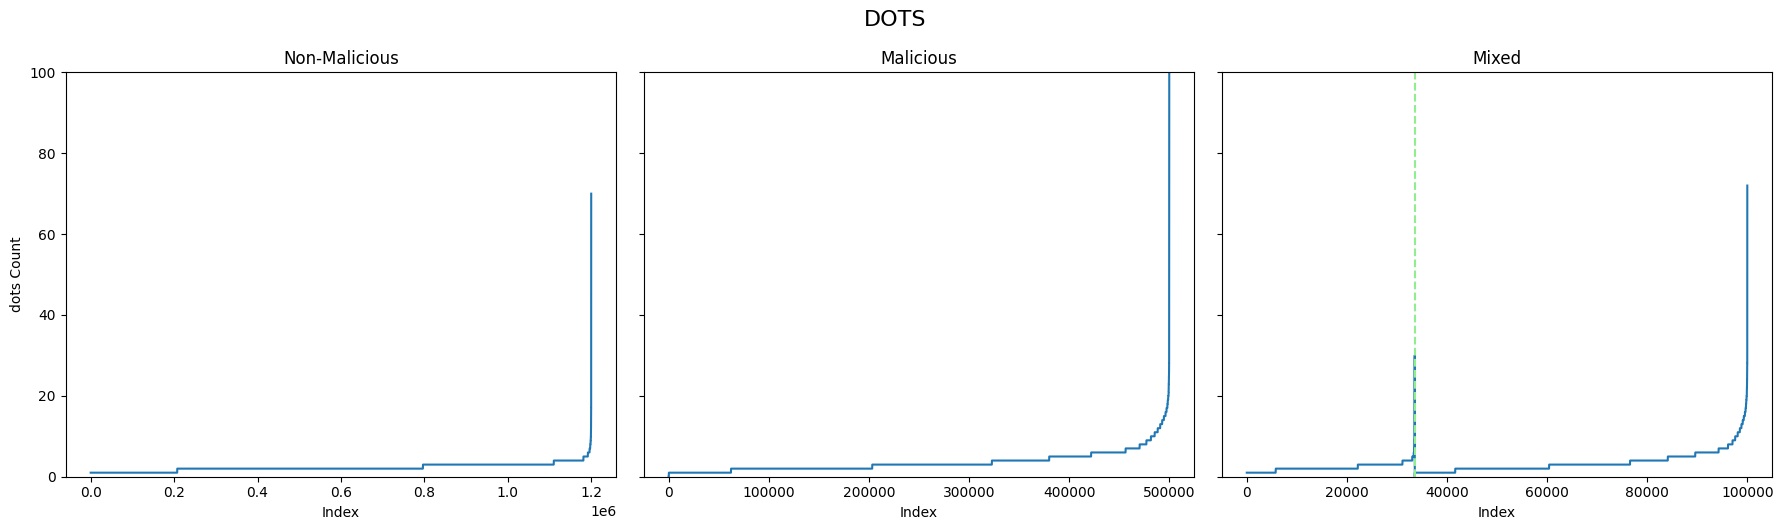

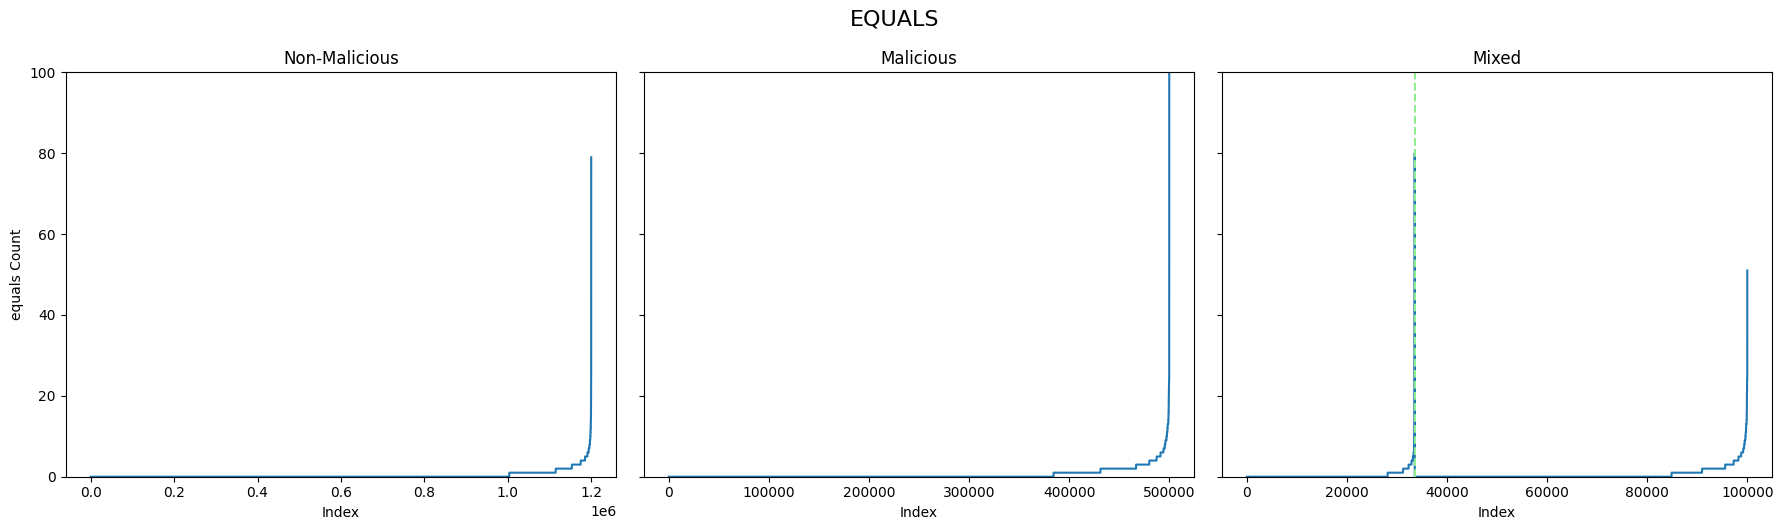

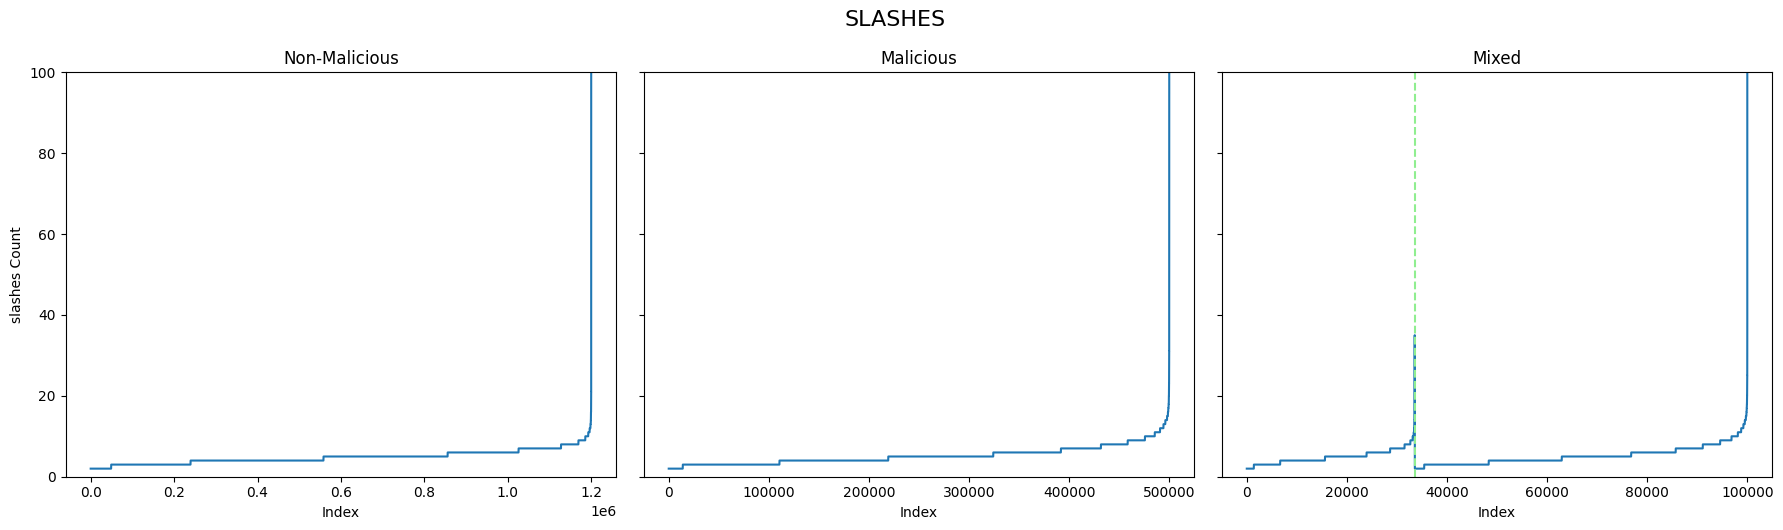

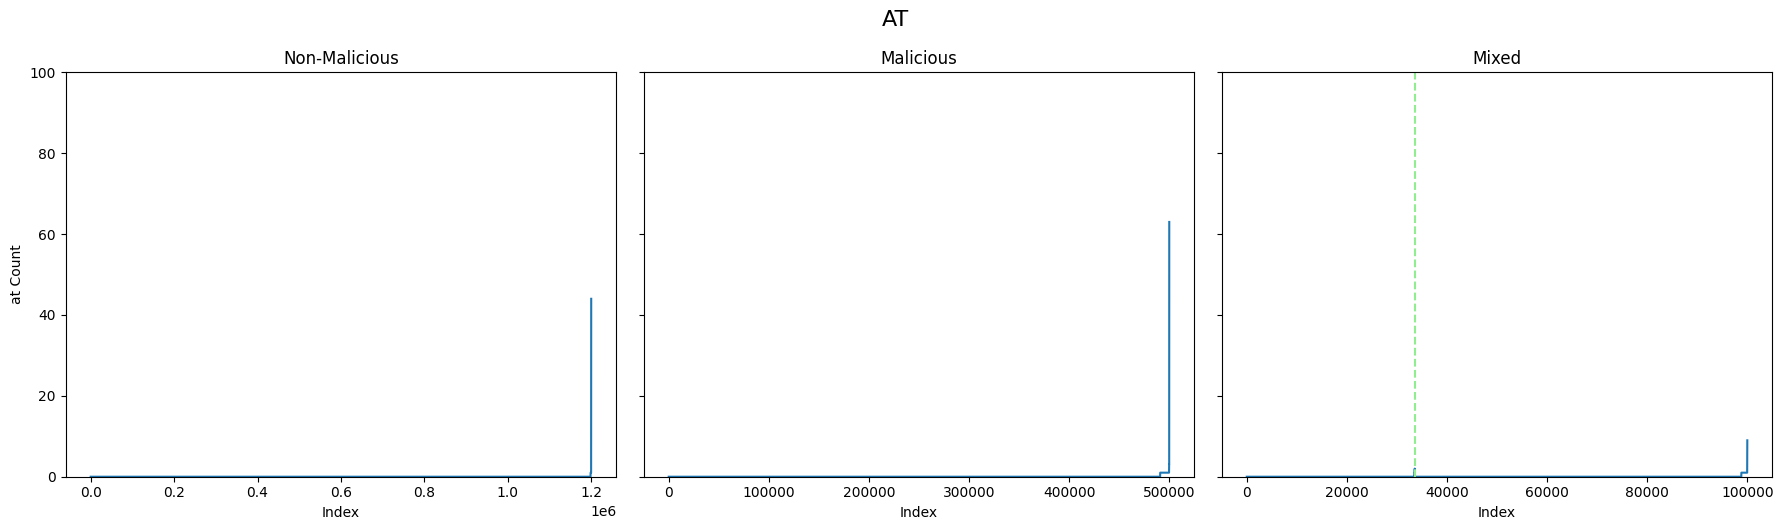

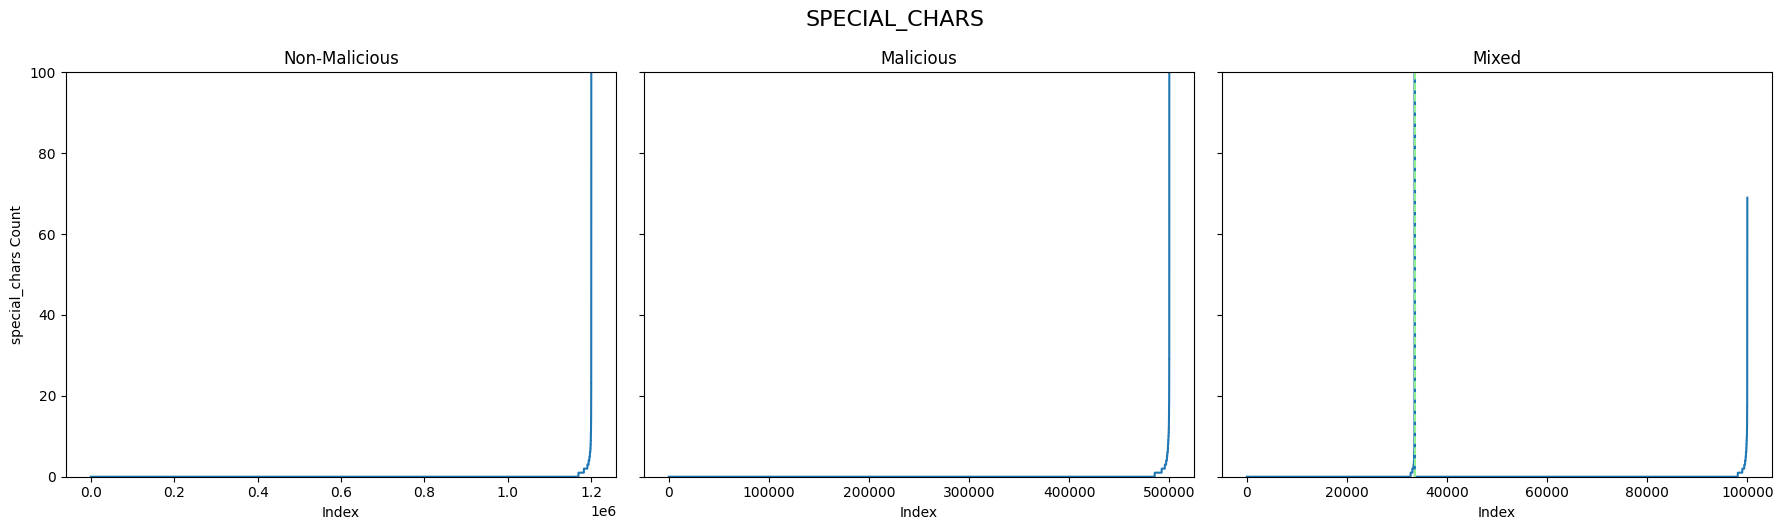

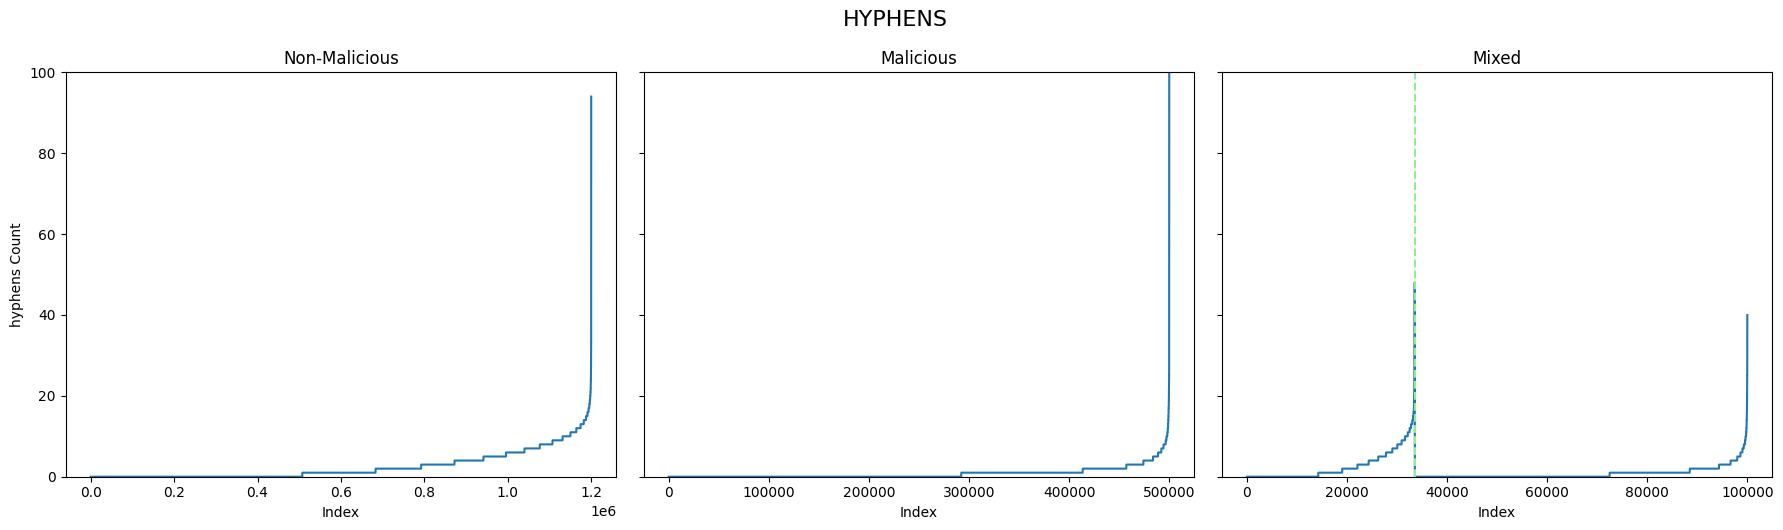

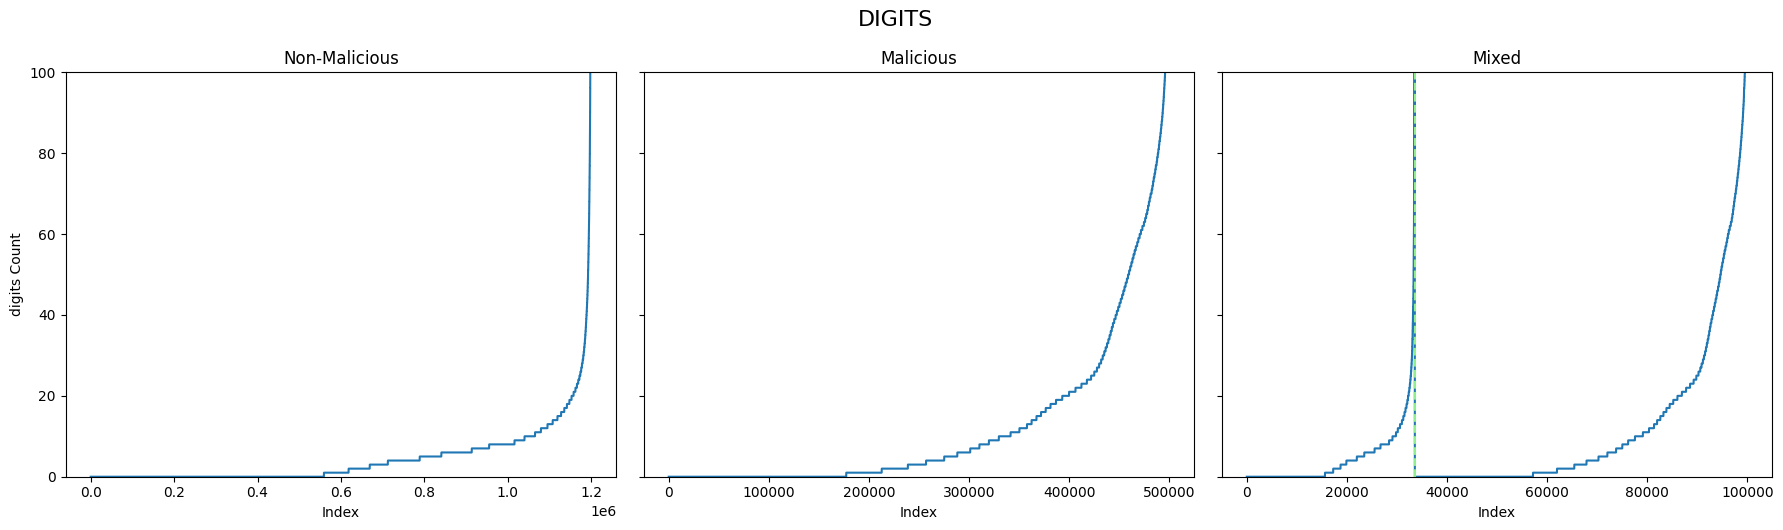

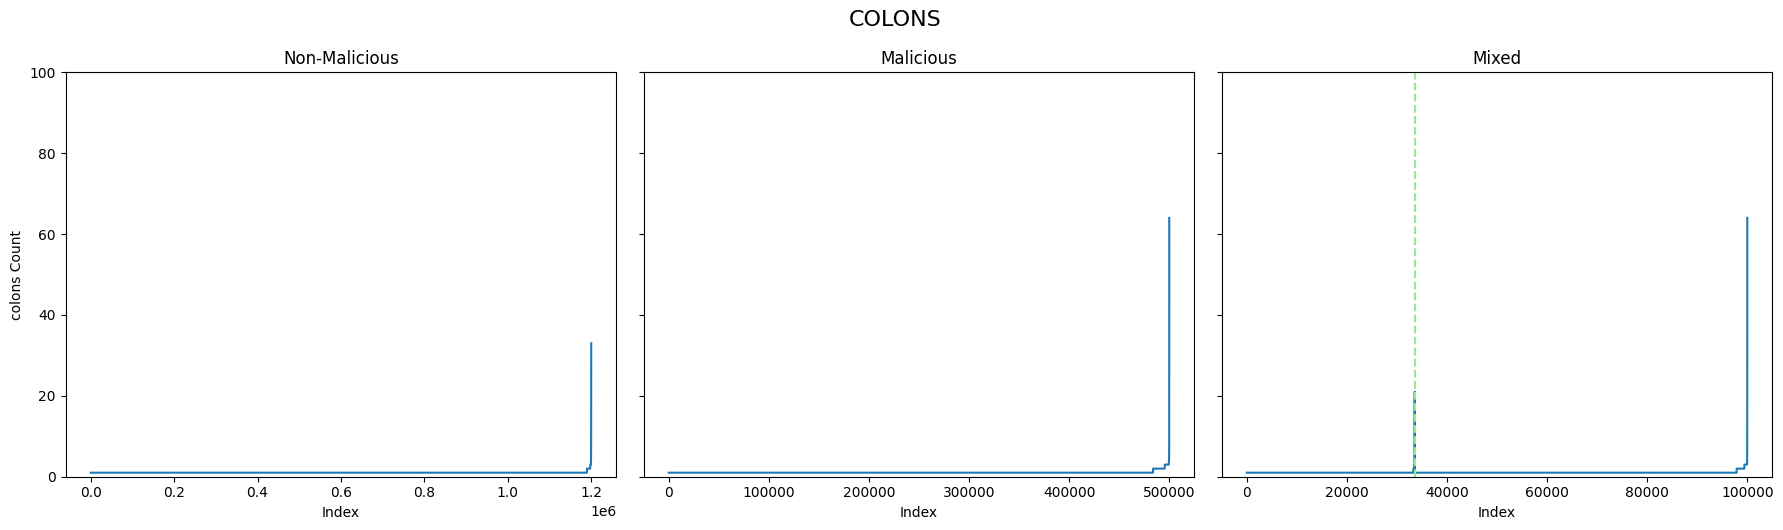

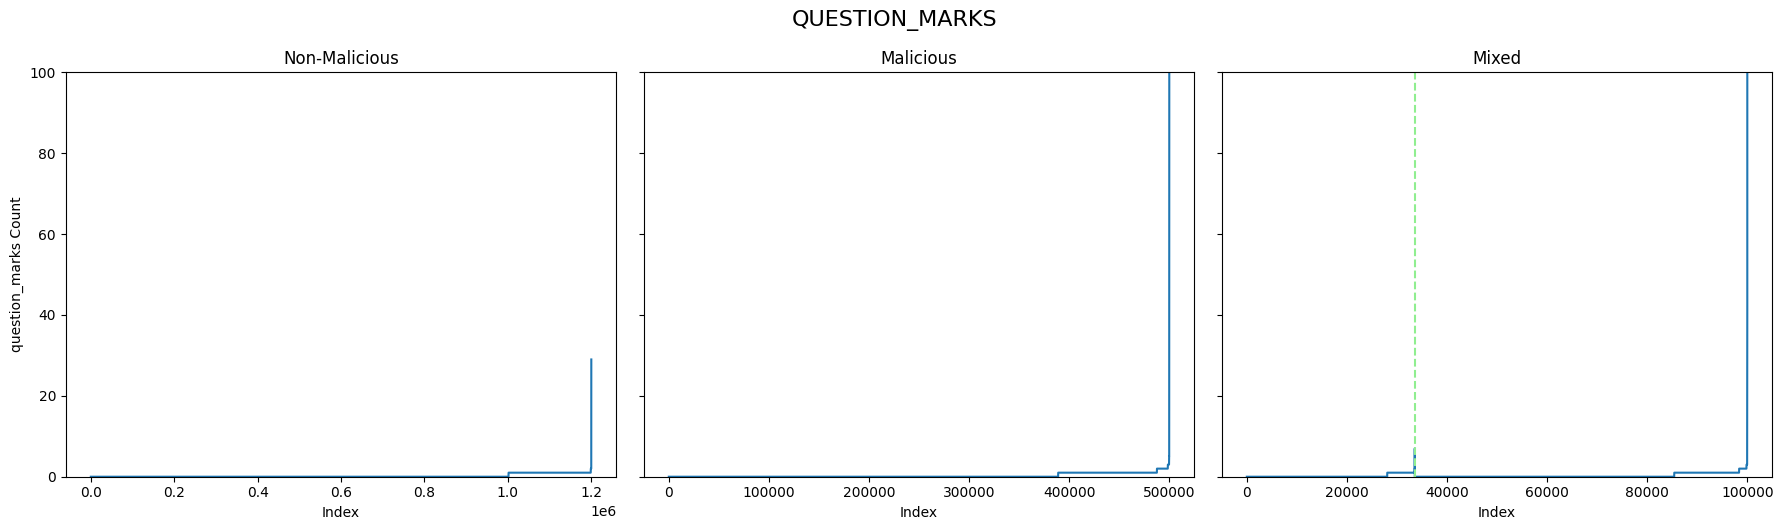

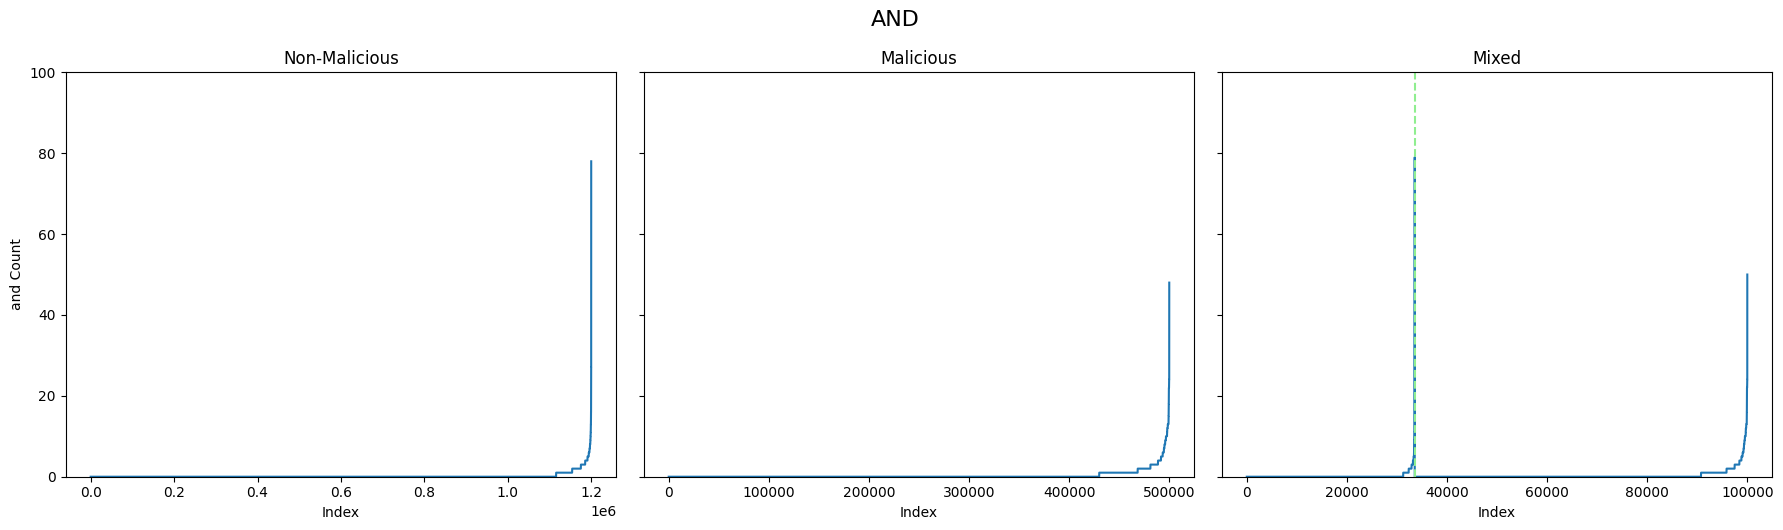

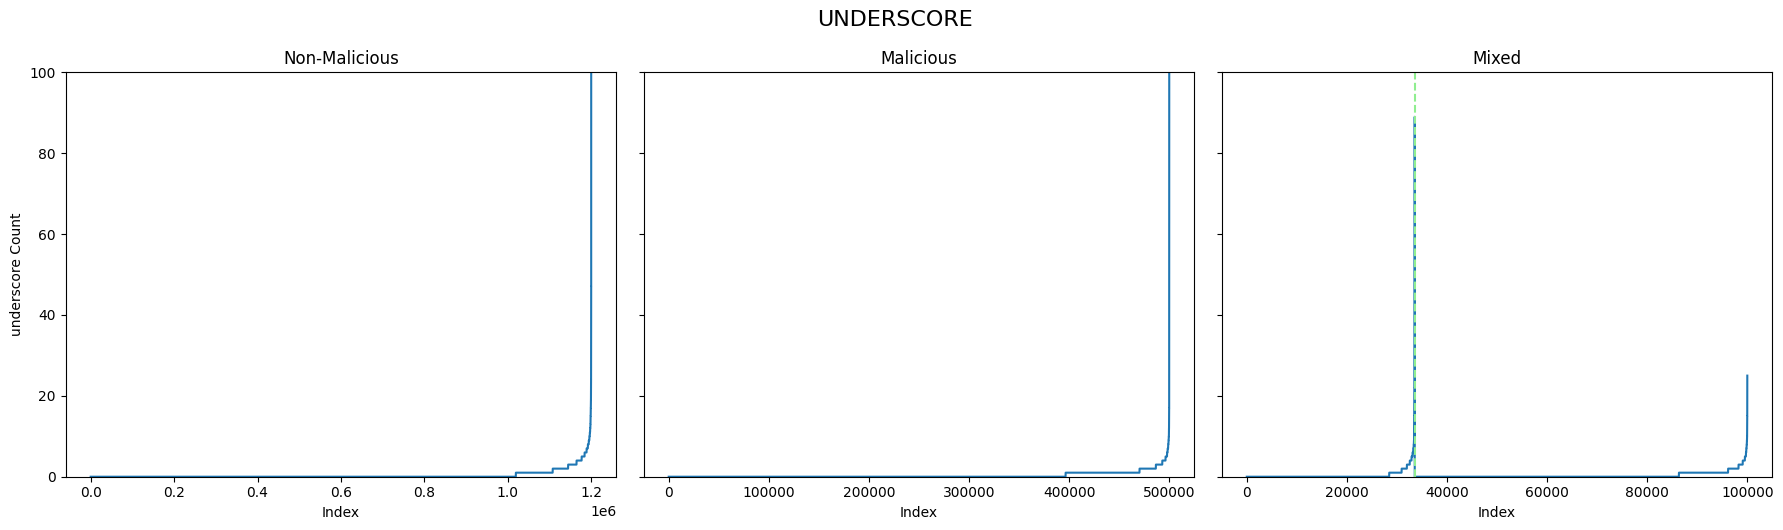

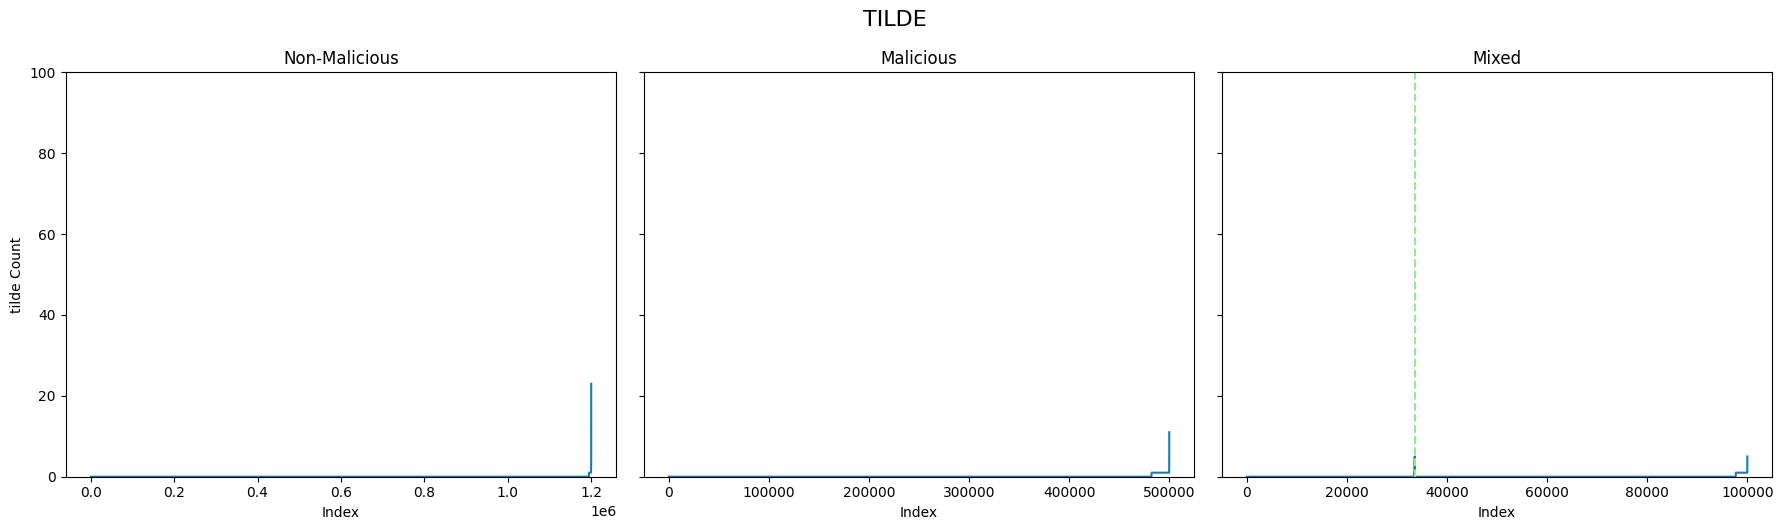

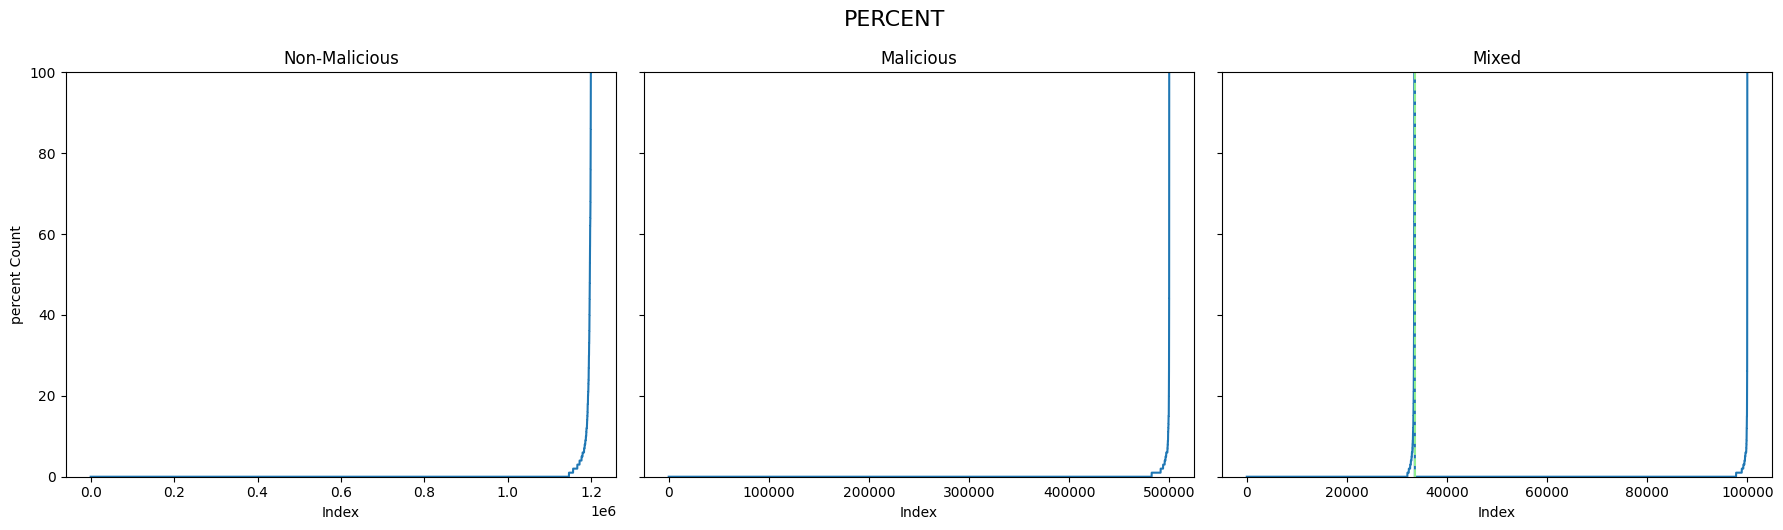

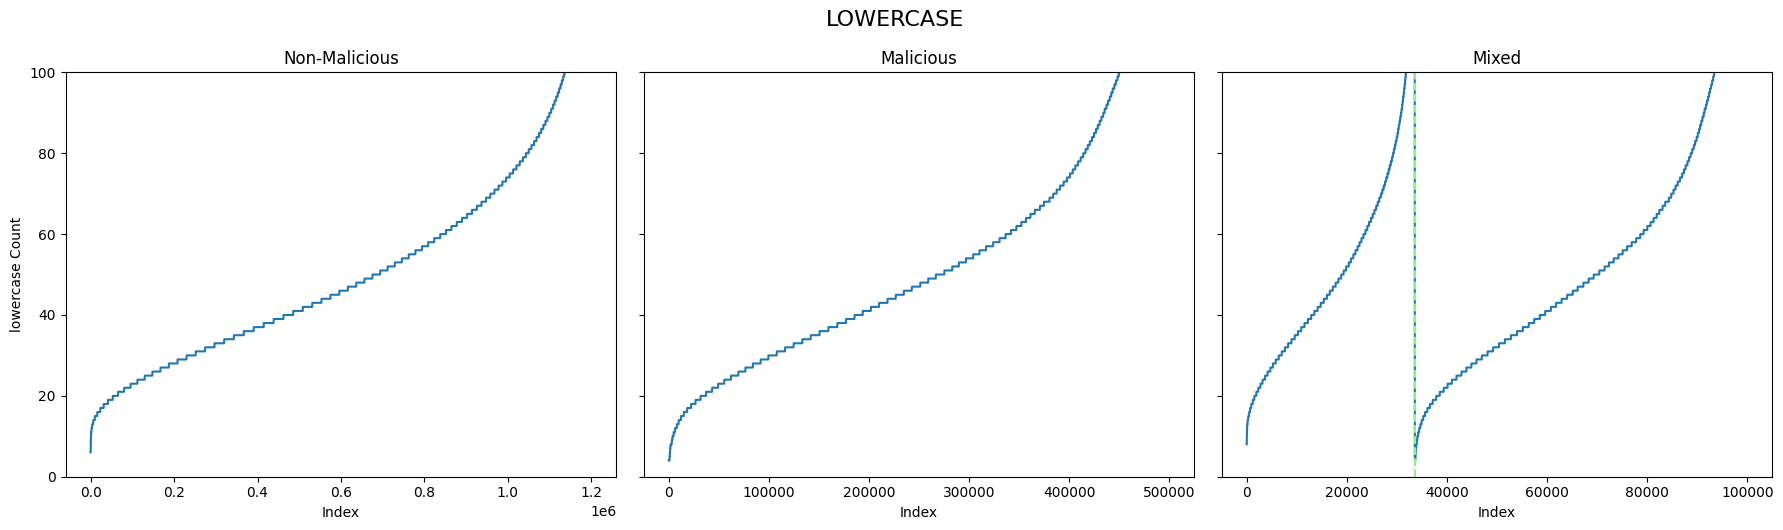

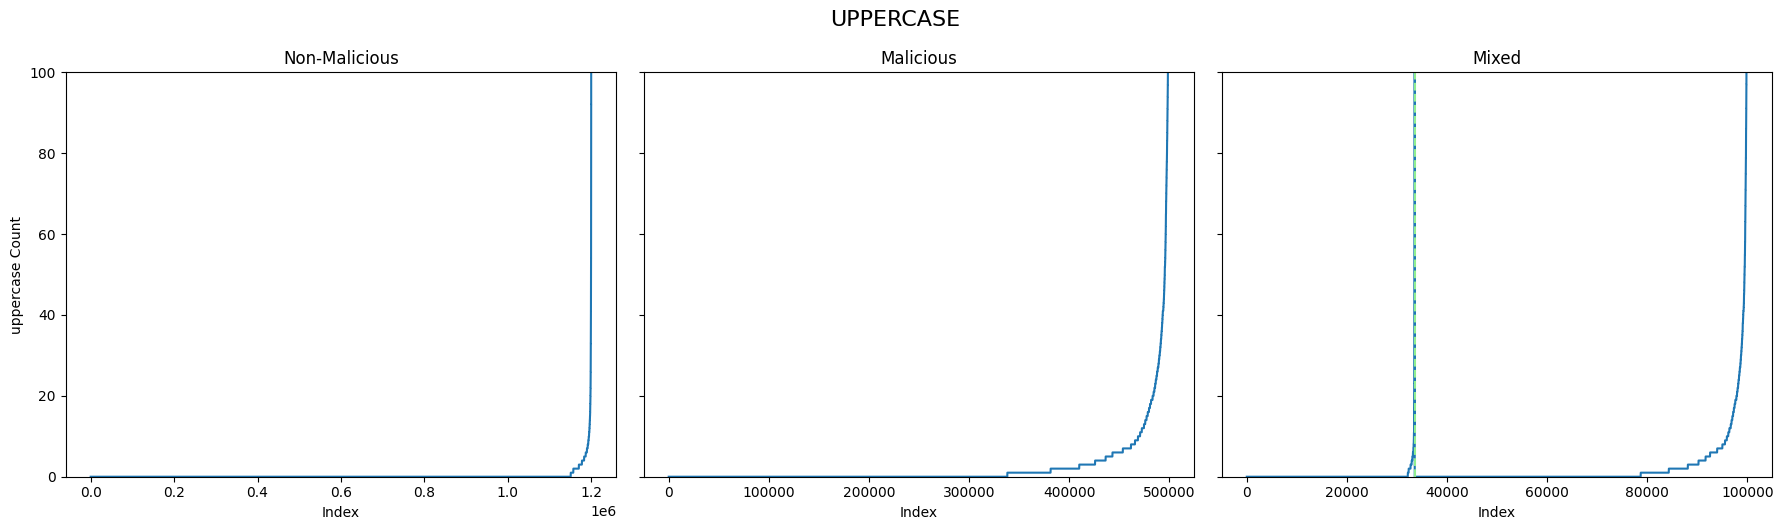

In [7]:
column_list = ["dots", "equals", "slashes", "at", "special_chars", "hyphens", "digits", "colons", "question_marks", "and", "underscore", "tilde", "percent", "lowercase", "uppercase"]

for i in column_list:
    line_plot(i)

In [8]:
def correlation(df, feature_columns, label_col="label"):
    # Make a temporary list without modifying original
    columns = feature_columns + [label_col]

    # Select relevant columns
    selected_df = df[columns]

    # Compute correlation matrix
    corr = selected_df.corr(numeric_only=True)

    # Filter correlation only with the label
    corr_with_label = corr[[label_col]].drop(label_col)

    # Plot heatmap
    plt.figure(figsize=(6, len(corr_with_label) * 0.5 + 2))
    sns.heatmap(corr_with_label, annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")
    plt.title("Correlation of Features with Label", fontsize=14)
    plt.xlabel("Label")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()


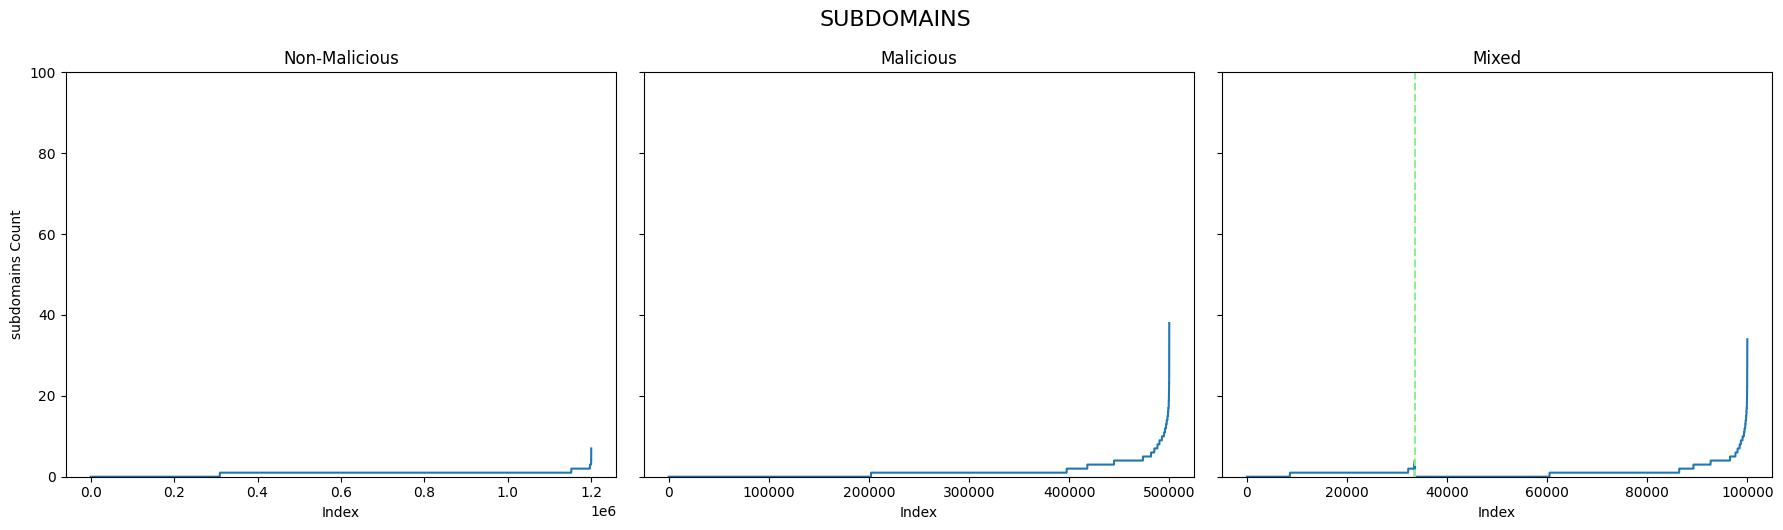

In [9]:
line_plot("subdomains")

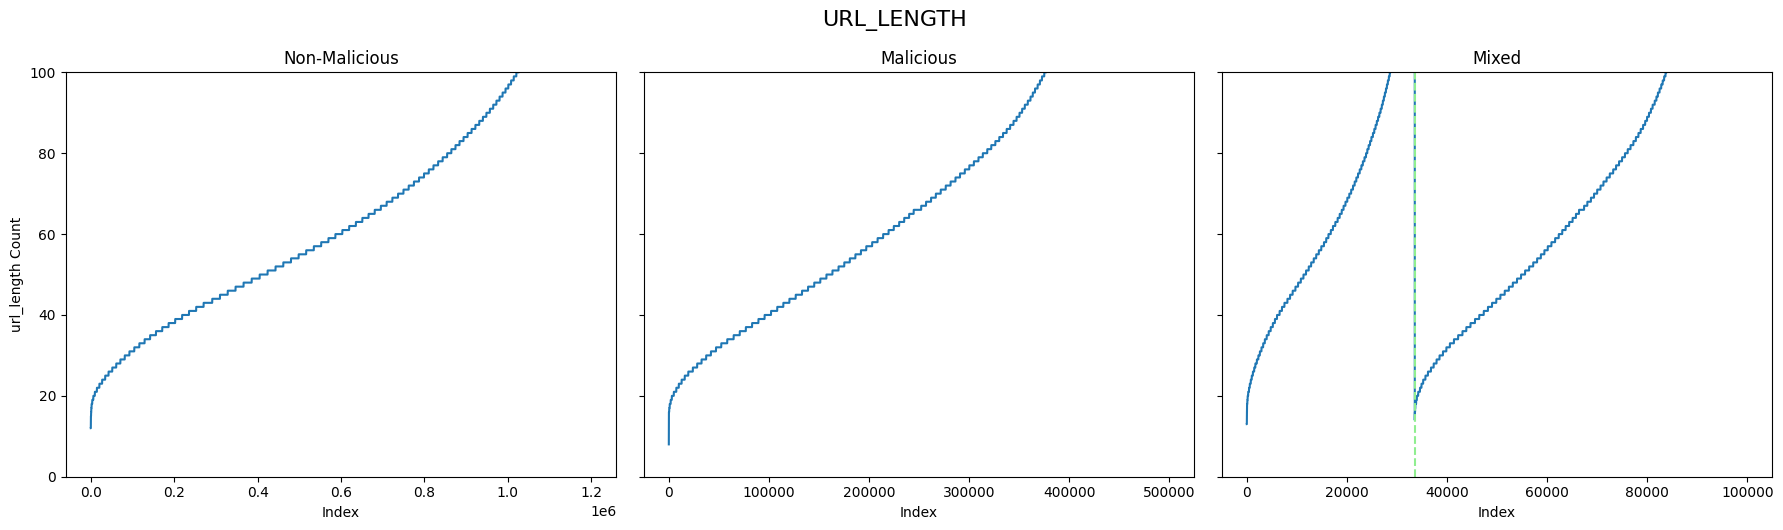

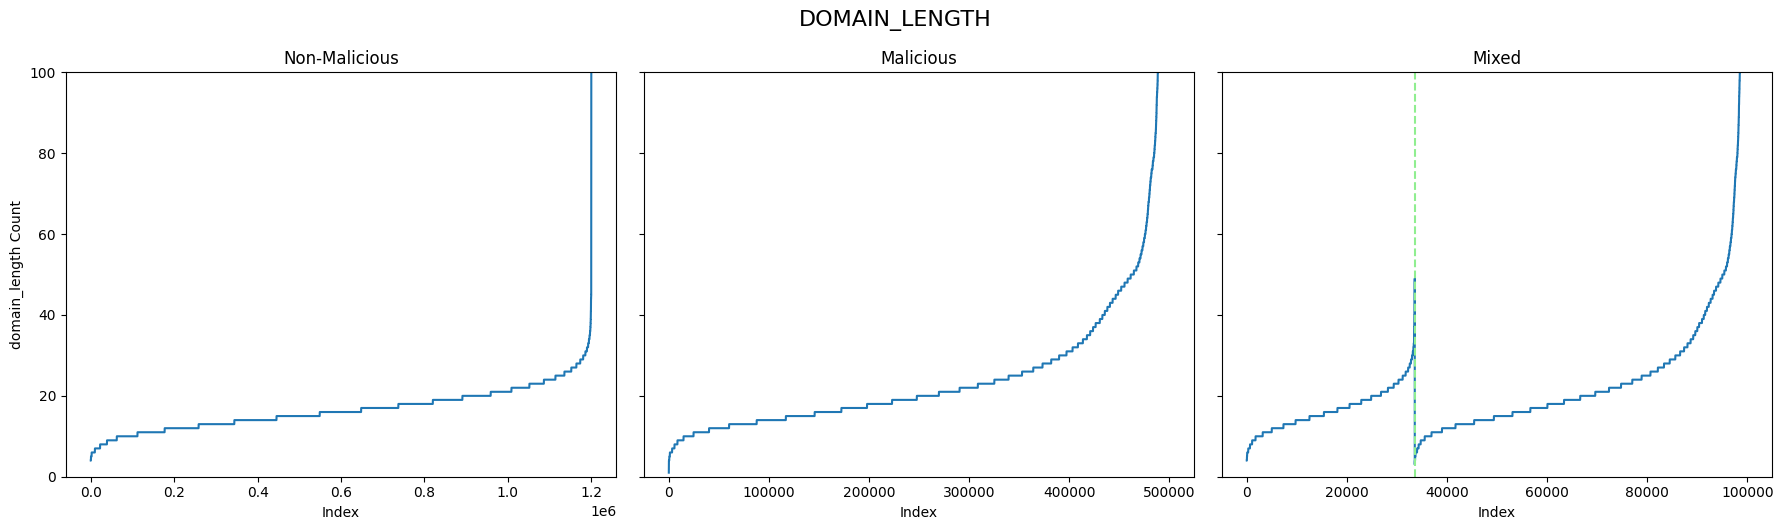

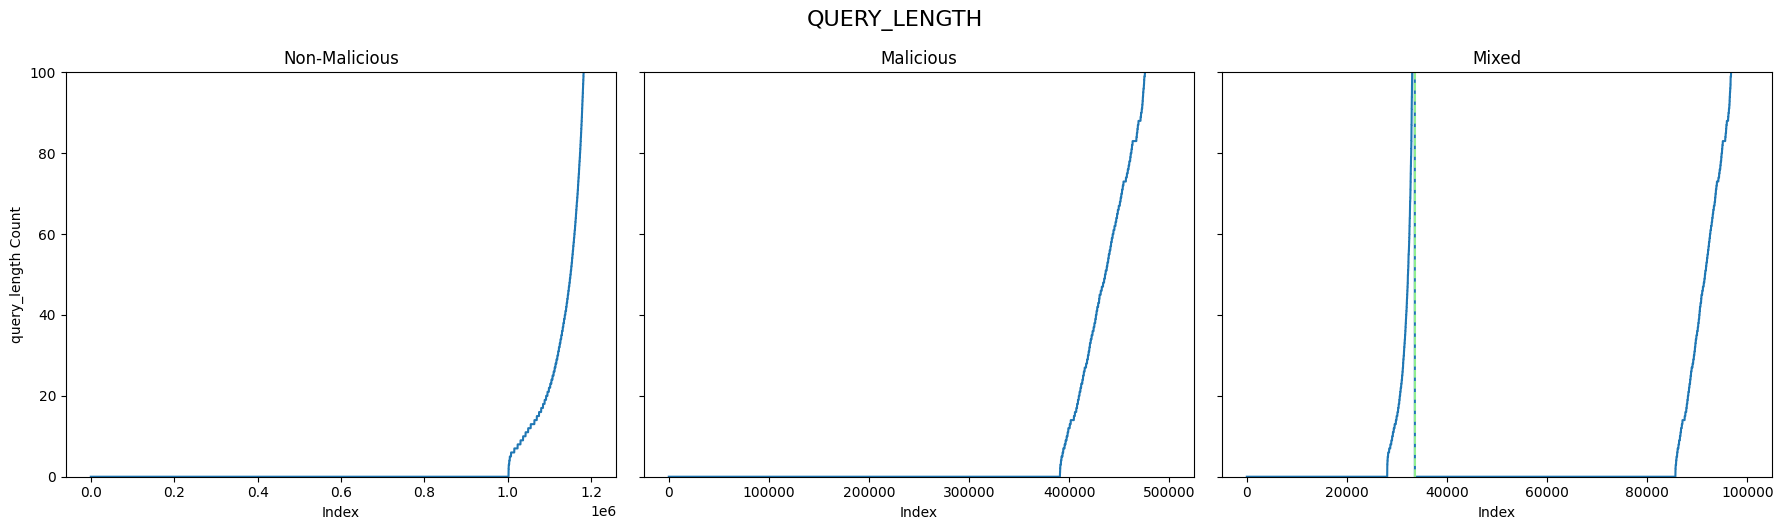

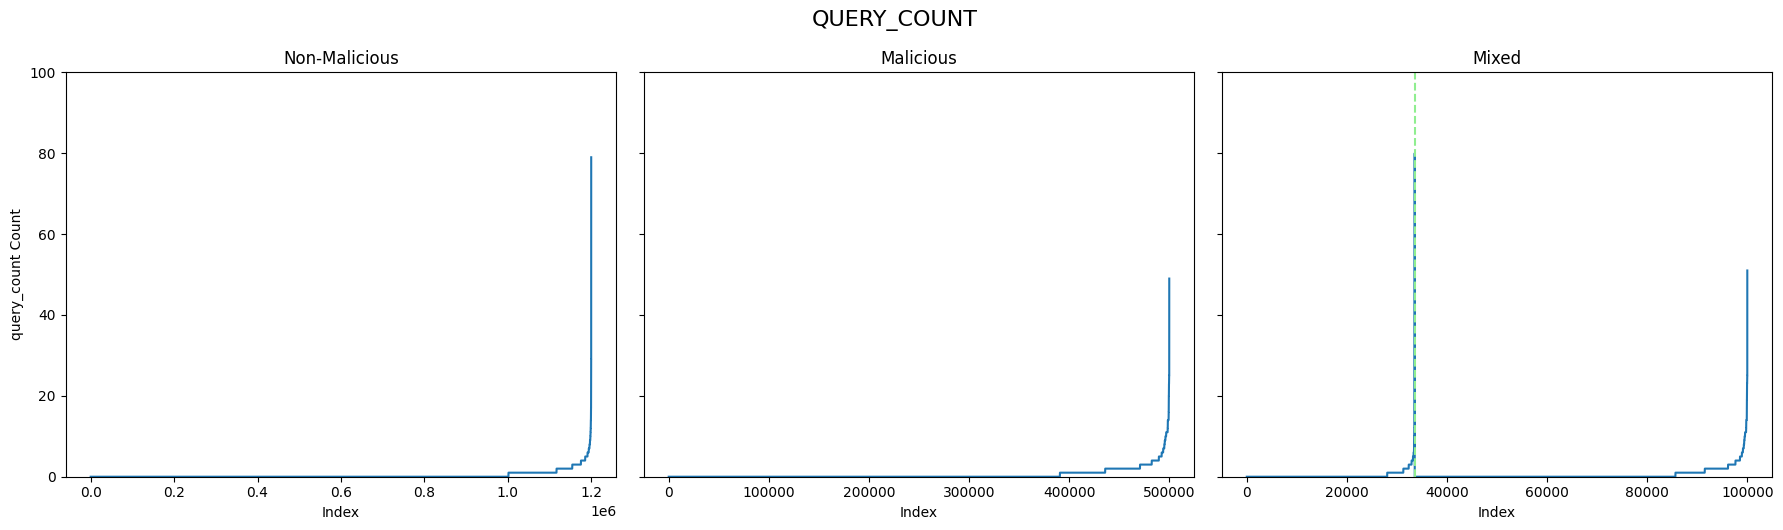

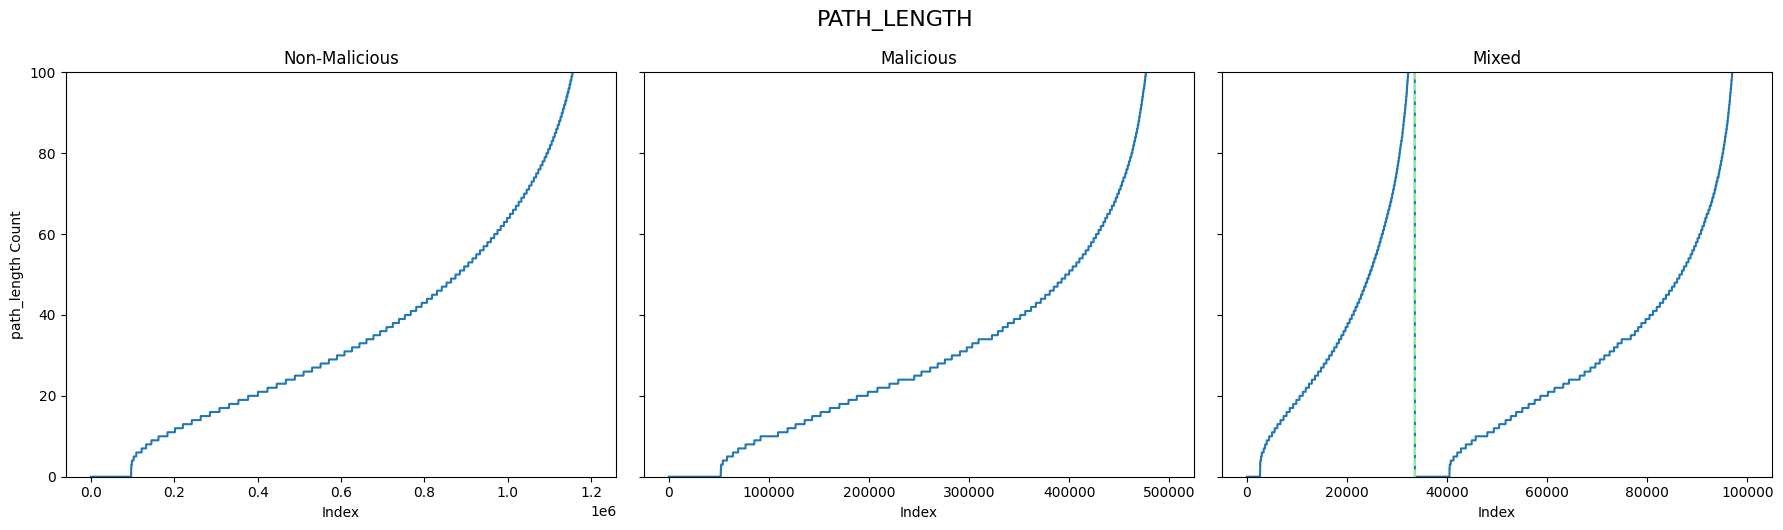

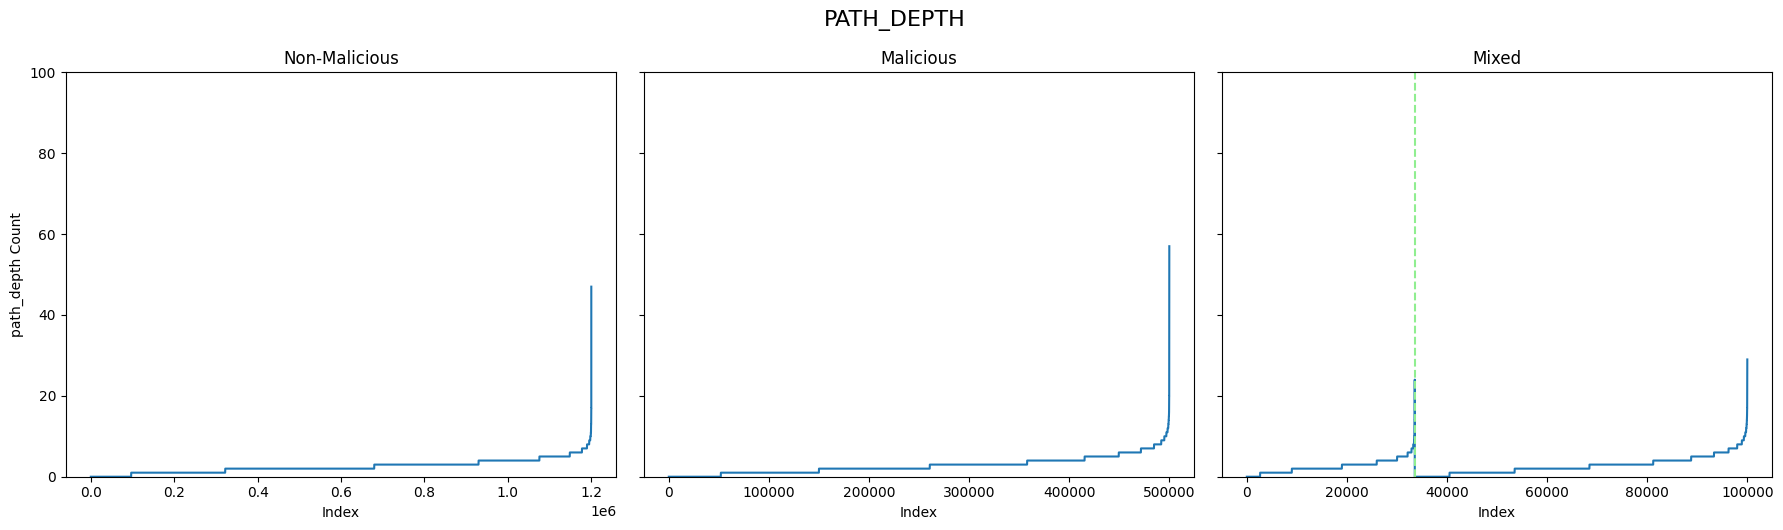

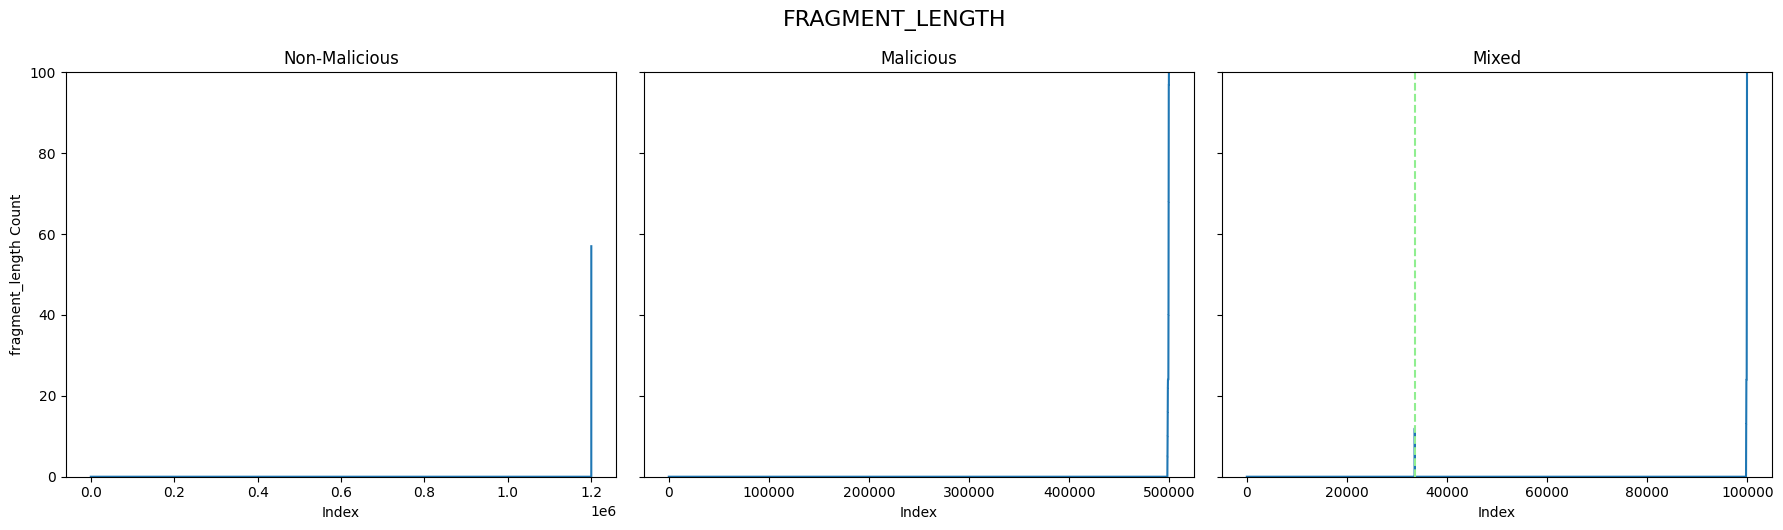

In [10]:
column_list = ["url_length", "domain_length", "query_length", "query_count", "path_length", "path_depth", "fragment_length"]

for i in column_list:
    line_plot(i)

In [12]:
def histogram_plot(column_name):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    axes[0].hist(cf1[column_name], bins=30, color='blue', alpha=0.7)
    axes[0].set_title("Non-Malicious")
    axes[0].set_xlabel(f"{column_name} Ratio")
    axes[0].set_ylabel("Frequency")
    axes[0].set_xlim(0, 1)

    axes[1].hist(cf2[column_name], bins=30, color='red', alpha=0.7)
    axes[1].set_title("Malicious")
    axes[1].set_xlabel(f"{column_name} Ratio")
    axes[1].set_xlim(0, 1)

    before = df.loc[:33557][column_name]
    after = df.loc[33558:][column_name]
    combined = pd.concat([before, after], ignore_index=True)

    axes[2].hist(combined, bins=30, color='purple', alpha=0.7)
    axes[2].set_title("Mixed")
    axes[2].set_xlabel(f"{column_name} Ratio")
    axes[2].set_xlim(0, 1)

    plt.tight_layout()
    plt.suptitle(f"Histogram of {column_name.upper()}", fontsize=16, y=1.05)
    plt.show()


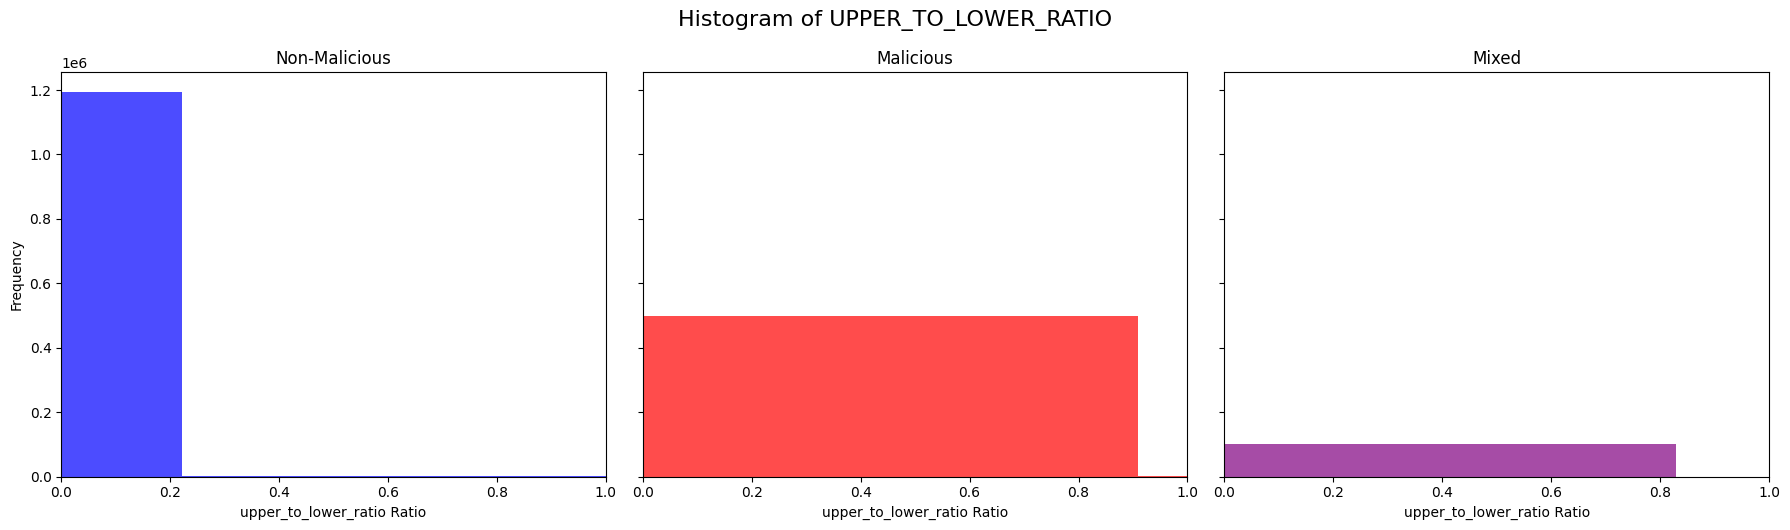

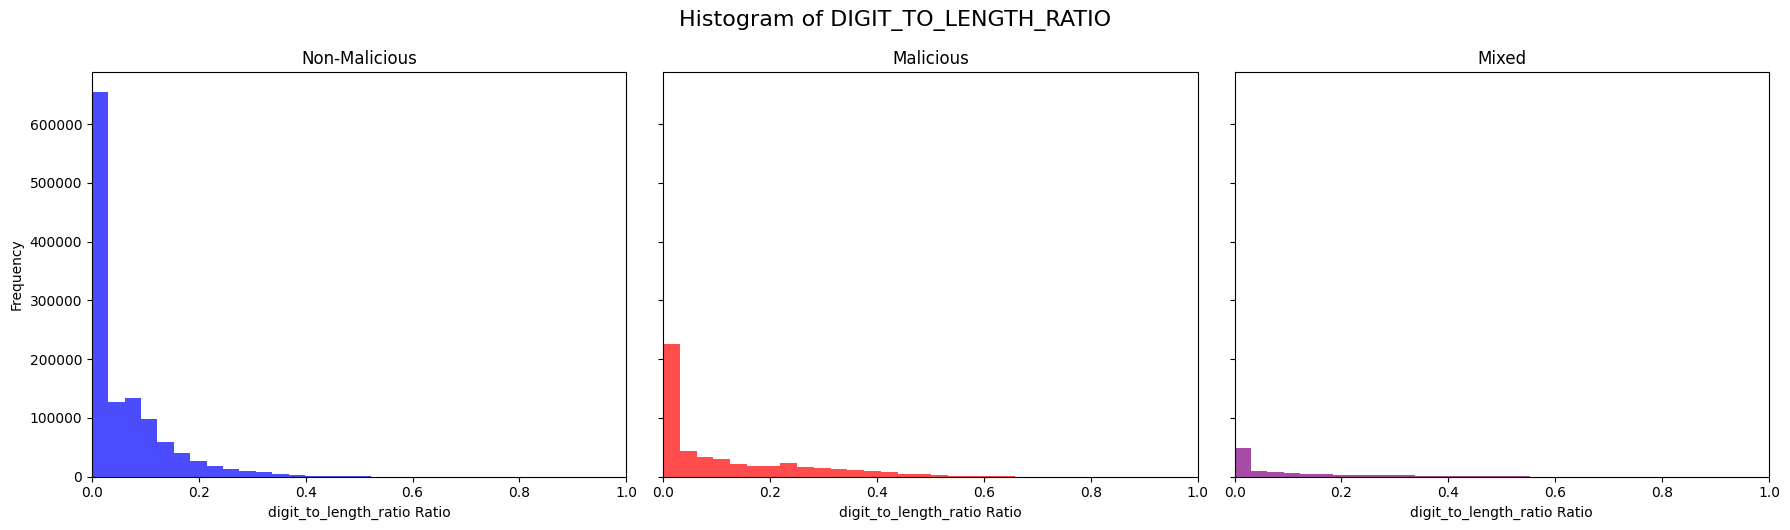

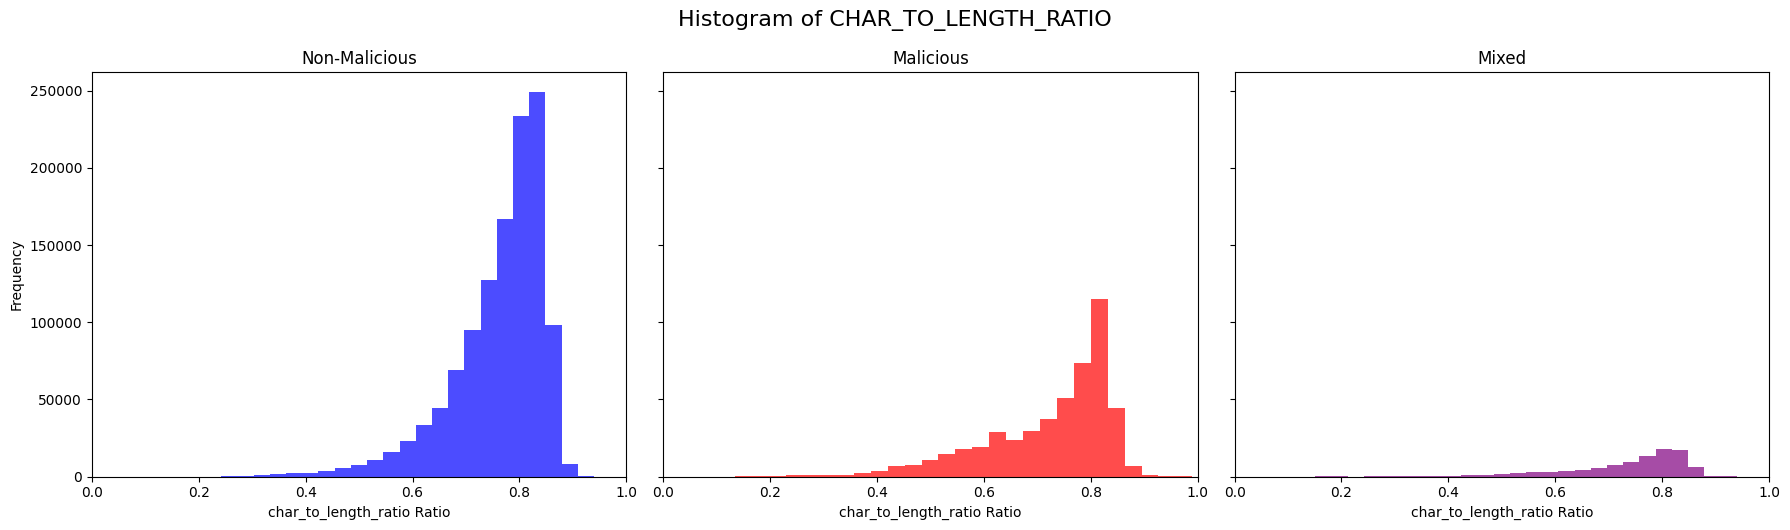

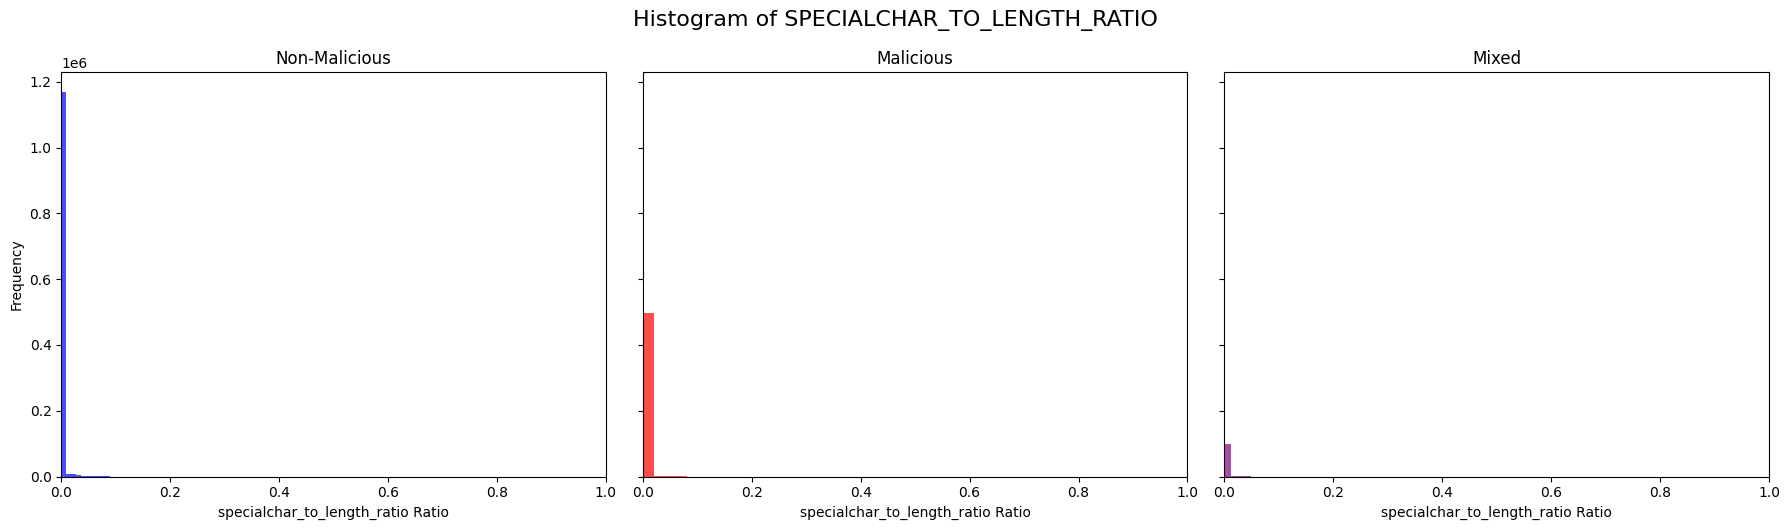

In [13]:
column_list = ["upper_to_lower_ratio", "digit_to_length_ratio", "char_to_length_ratio",
       "specialchar_to_length_ratio"]

for i in column_list:
    histogram_plot(i)

In [14]:
def pie_plot(column_list):
    for column_name in column_list:
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        datasets = [cf1, cf2, df]
        titles = ["Non-Malicious", "Malicious", "Mixed"]

        for ax, data, title in zip(axes, datasets, titles):
            counts = data[column_name].value_counts().sort_index()
            labels = [f"{val}" for val in counts.index]  # dynamic labels from values
            colors = ["lightcoral", "lightgreen"] if set(counts.index) == {0, 1} else None

            ax.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
            ax.set_title(title)

        plt.suptitle(f"Pie Chart for {column_name.upper()}", fontsize=16, y=1.05)
        plt.tight_layout()
        plt.show()

KeyError: 'i'

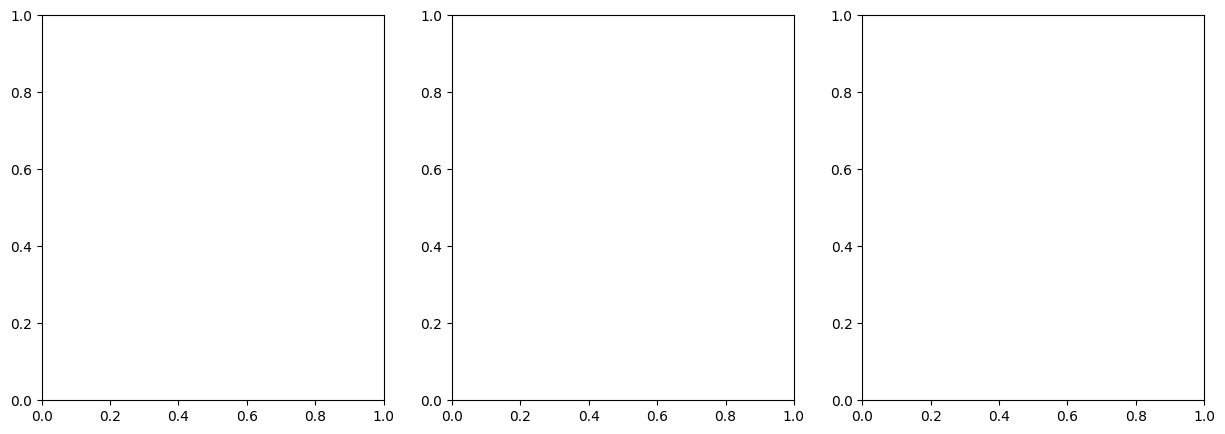

In [15]:
column_list = ["is_https"]

for i in column_list:
    pie_plot(i)